### Student Information
Name: 林欣諭

Student ID: 114065543   

GitHub ID: hsinyulin1323

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [16]:
### Begin Assignment Here

import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

In [17]:
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv", low_memory=False)
# low_memory=False：避免因為檔案大導致 dtypes 猜測錯誤。

print("num_cols =", df.shape[1])
print(df.columns.tolist())

# 簡化欄位
stock_df = df[["type","author", "text", "label"]].dropna()

print(stock_df.shape)
stock_df.head()

num_cols = 16
['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
(847, 4)


,type,author,text,label
0,comment,StickyTip420,Calls on retards,-1.0
1,comment,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,0.0
2,comment,Btankersly66,Seeing lots of red in the ticker.,0.0
3,post,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0
4,comment,Just-Big6411,He didn’t say thank you.,-1.0


### **>>> Exercise 1 :**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [18]:
# Exercise 1
for i in range(3):
    print("Example", i+1)
    print(stock_df['text'].iloc[i])   # 從 text 欄位取前 3 筆
    print("\n")

Example 1
Calls on retards


Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


Example 3
Seeing lots of red in the ticker.




### **>>> Exercise 2 :** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [19]:
print(stock_df.iloc[2:5,:4]) #不包含切片右邊
print("________________________")
stock_df.loc[2:4,'text'] #包含切片右邊4

      type        author                                               text  \
2  comment  Btankersly66                  Seeing lots of red in the ticker.   
3     post     emiljenfn  Vision Marine Technologies Inc. is rewriting t...   
4  comment  Just-Big6411                           He didn’t say thank you.   

   label  
2    0.0  
3    1.0  
4   -1.0  
________________________


2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
Name: text, dtype: object

### **>>> Exercise 3 :**  
練習用每隔10筆資料取一次，取出前5筆label為1.0的資料

In [20]:
stock_df[stock_df['label']==1.0][::10][0:5]

# ::10每隔10筆資料取一次
#再從上一步的結果中，取出前 5 筆。

,type,author,text,label
3,post,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0
78,comment,AdQuick8612,I think it’s gonna work itself out. I bought t...,1.0
168,comment,mazzaschi,The obvious can also be refreshing from CNBC: ...,1.0
219,comment,muffins95,Same. Back to break even after that last rip b...,1.0
319,comment,inuvash255,Etrade has a feed of news articles about how r...,1.0


### >>> **Exercise 4 :** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [21]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### >>> dummy 練習:


In [22]:
dummy_series = pd.Series(["dummy_record", 1.0], index=["text", "label"])
dummy_series
#用成像是 Excel 裡的一列 pd.Series([欄位內容],[欄位名稱])

text     dummy_record
label             1.0
dtype: object

In [23]:
dummy_series.to_frame().T
#把series變成dataframe，再進行轉置
result_with_series = pd.concat([stock_df, dummy_series.to_frame().T], ignore_index=True)
#把「新的一筆」接到原本的 stock_df。
len(result_with_series)

848

In [24]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,author,text,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,0,0


In [25]:
dummy_dict = [{'text': 'dummy_record',
               'label': 1.0
              }]
X = pd.concat([stock_df, pd.DataFrame(dummy_dict)], ignore_index=True)
len(X)

#外層是 list，裡面是一個 dict → 每個 dict = 一筆 row。
#因為是 DataFrame，所以一次可以放很多筆 row。



848

In [26]:
X.dropna(inplace=True)
#把該筆 dummy row 刪掉

In [27]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,author,text,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [28]:
len(X)

847

### **>>> Exercise 5 :**  

In [29]:
stock_df.head().isnull()

,type,author,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


### **>>> Exercise 6 :** 


進行抽樣 (n=100)

In [30]:
stock_df_sample = stock_df.sample(n=100)
print(len(stock_df_sample))
stock_df_sample[0:5]

100


,type,author,text,label
422,comment,chobro17,Lmao TSLA is green ![img](emote|t5_2th52|4271),1.0
719,comment,HistoricalComeBack,Can I have a Flair Brazilian Retard ?,-1.0
586,comment,Rookwood,"As a person who owns silver etfs, I think it's...",0.0
595,post,AutoModerator,"&#x200B;\n\n [Cryptocurrency Prices, Charts, D...",0.0
576,comment,capalot455,Hold Tesla ??,0.0


### **>>>Exercise 7:** 


<Axes: title={'center': 'label distribution'}, xlabel='label'>

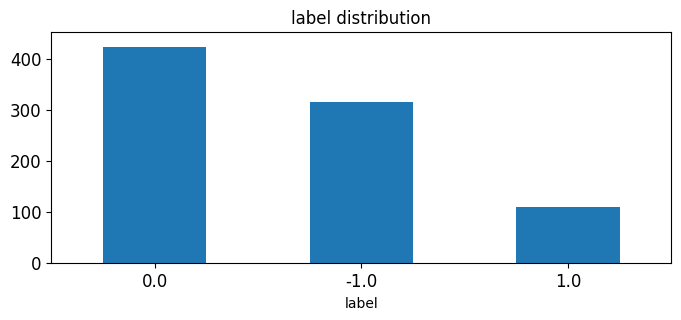

In [31]:
stock_df.label.value_counts().plot(
    kind='bar',
    title= 'label distribution',
    ylim= [0, df.label.value_counts().max()+30],
    rot =0, fontsize=12, figsize=(8,3)
)

<Axes: title={'center': 'label distribution'}, xlabel='label'>

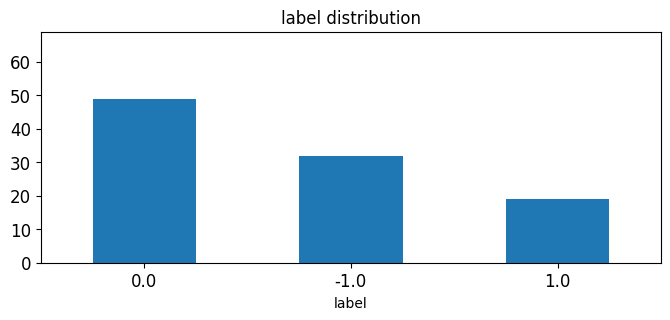

In [32]:
stock_df_sample.label.value_counts().plot(
    kind='bar',
    title= 'label distribution',
    ylim= [0, stock_df_sample.label.value_counts().max()+20],
    rot =0, fontsize=12, figsize=(8,3)
)

### **>>>Exercise 8:** 


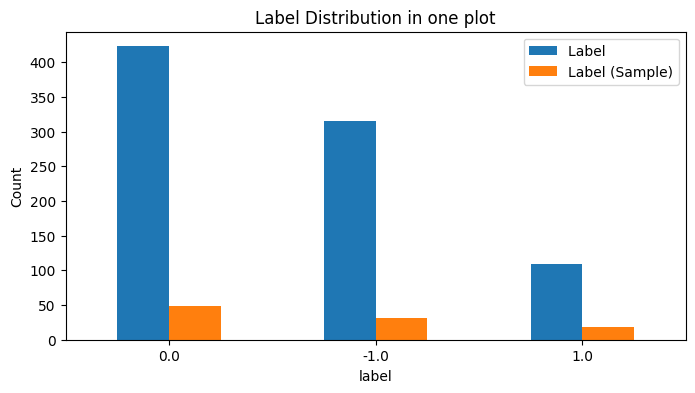

In [33]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

# 計算兩個分布
full_counts   = stock_df.label.value_counts()
sample_counts = stock_df_sample.label.value_counts()

# 合併成一個 DataFrame
df_compare = pd.DataFrame({
    "Label ": full_counts,
    "Label (Sample)": sample_counts
    
}).fillna(0)

# 畫並排的長條圖
df_compare.plot(kind="bar", figsize=(8,4))
plt.title("Label Distribution in one plot")
ylim = [0, full_counts.max()+30],
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()




### **>>> Exercise 9 :**
df_counts：數字矩陣，記錄「哪篇文章包含哪些詞、出現幾次」。

analyze(...)：實際把文章切詞後的 token list，讓你看到 CountVectorizer 做了什麼前處理。


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words="english") #去除掉了停用詞！
df_counts = count_vect.fit_transform(stock_df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

analyze = count_vect.build_analyzer()
analyze(stock_df.text[3])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 4105)>
  Coords	Values
  (0, 646)	1
  (0, 3087)	1


['vision',
 'marine',
 'technologies',
 'rewriting',
 'watercraft',
 'rulebook',
 'collaboration',
 'shaun',
 'torrente',
 'achieved',
 'unthinkable',
 'blazing',
 '116',
 'mph',
 'water',
 'isn',
 'just',
 'speed',
 'propelling',
 'electric',
 'boating',
 'new',
 'era',
 'cutting',
 'edge',
 'technology',
 'combined',
 'torrente',
 'skill',
 'making',
 'waves',
 'll',
 'ripple',
 'generations',
 'highlight',
 'main',
 'points',
 'vision',
 'marine',
 'technologies',
 'achieves',
 'record',
 'breaking',
 '116',
 'mph',
 'speed',
 'water',
 'shaun',
 'torrente',
 'feat',
 'highlights',
 'power',
 'electric',
 'boating',
 'pushes',
 'limits',
 'innovation',
 'partners',
 'like',
 'octillion',
 'power',
 'systems',
 'danfoss',
 'editron',
 'contribute',
 'groundbreaking',
 'achievement',
 'tldr',
 'hold',
 'seats',
 'vision',
 'marine',
 'technologies',
 'shaun',
 'torrente',
 'shattered',
 'water',
 'speed',
 'record',
 'astonishing',
 '116',
 'mph',
 'isn',
 'just',
 'speed',
 'pioneeri

In [35]:
df_counts.shape

(847, 4105)

In [36]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [37]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [38]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10 :**


In [39]:
nonzero_cols = df_counts[5].nonzero()[1] # 找出這一行非零的欄位索引
count_vect.get_feature_names_out()[nonzero_cols] 

array(['hoping', 'ejaculate', 'wet', 'warm', 'puss', 'tonight', 'wish',
       'luck'], dtype=object)

### 畫熱力圖 seaborn

In [40]:
plot_df_x= ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [41]:
# obtain document index
plot_df_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [42]:
plot_df_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_df_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

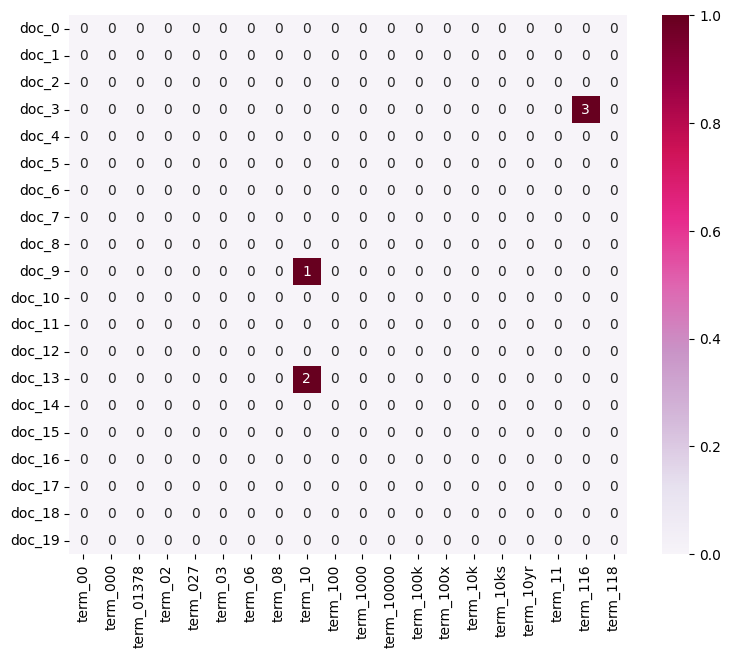

In [43]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_df_z, columns = plot_df_x, index = plot_df_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#cbar=False 不顯示右邊的顏色條

### **>>> Exercise 11:** 

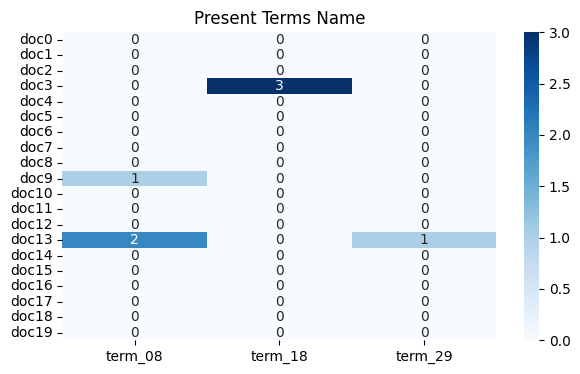

In [44]:
#Exercise 11 : 
import seaborn as sns

plot_zzz = df_counts[0:20,0:50].toarray()

# 找出哪些詞在這個 20x50 子矩陣裡至少出現一次
mask = plot_zzz.sum(axis=0) > 0   # 對欄做總和
selected_terms = count_vect.get_feature_names_out()[:50][mask]
orig_cols  = np.arange(len(mask))[mask] 
words      = selected_terms
"""
# 3) 由原始索引取真正的詞彙
feat_names = count_vect.get_feature_names_out()
words = feat_names[orig_cols]
"""

term_codes = [f"term_{j:02d}" for j in orig_cols]

term_freqs = plot_zzz[:, mask].sum(axis=0) #篩選出有出現過的詞」
sorted_idx = np.argsort(-term_freqs) #按照詞頻順序重新排列

#看這些詞在不同文章 (row) 裡有沒有出現
df_todraw = pd.DataFrame(
    plot_zzz[:, mask][:, sorted_idx], 
    #columns= term_codes, 
    columns=[f"term_{orig_cols[j]:02d}" for j in sorted_idx], 
    index=[f"doc{i}" for i in range(20)]
)

plt.figure(figsize=(7,4))
sns.heatmap(df_todraw, cmap='Blues' , annot=True, cbar=True)
plt.title("Present Terms Name")
plt.show()

### >>> **Exercise 12 :**


In [45]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

print(term_freqs)

#用迴圈計算出詞頻

[3 3 1]


In [46]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
#直接對矩陣 sum

In [47]:
term_frequencies[0] #sum of first term: 00
#取某個詞在所有文件的總和（每個詞的出現次數）

np.int64(4)

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


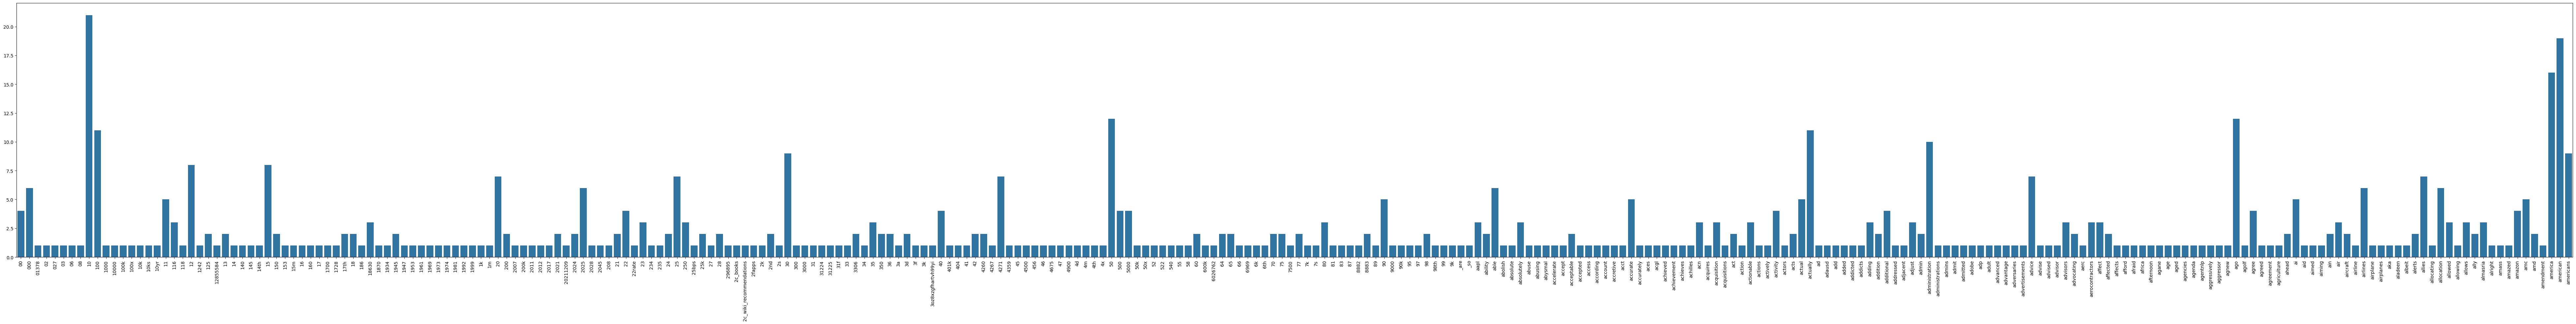

In [48]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [49]:
# Answer here
import plotly.express as px
import pandas as pd

top_n = 50  # 顯示前 50 個詞
terms = count_vect.get_feature_names_out()[:top_n]
freqs = term_frequencies[:top_n]

df_plot = pd.DataFrame({
    "term": terms,
    "frequency": freqs
})
fig = px.bar(df_plot, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues",  # sequential 漸層色
             title=f"Top {top_n} Terms Frequency (Interactive)")

fig.update_layout(xaxis_tickangle=-90)  # 把 x 軸標籤轉直
fig.show()




### >>> **Exercise 13 :** 



In [50]:
# Answer here
#取前50最常出現的詞
top_n = 50
terms = count_vect.get_feature_names_out()
freqs = np.asarray(df_counts.sum(axis=0))[0]

df_terms = pd.DataFrame({"term": terms, "frequency": freqs})
df_top = df_terms.sort_values("frequency", ascending=False).head(top_n)

print(df_top.head())

fig = px.bar(df_top, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues", 
             title=f"Top {top_n} Terms Frequency")
fig.update_layout(xaxis_tickangle=-90)  # 轉直標籤
fig.show()

        term  frequency
2308  market        111
2088    just         95
3771   trump         92
2197    like         83
747    china         72


### >>> **Exercise 14 :** 


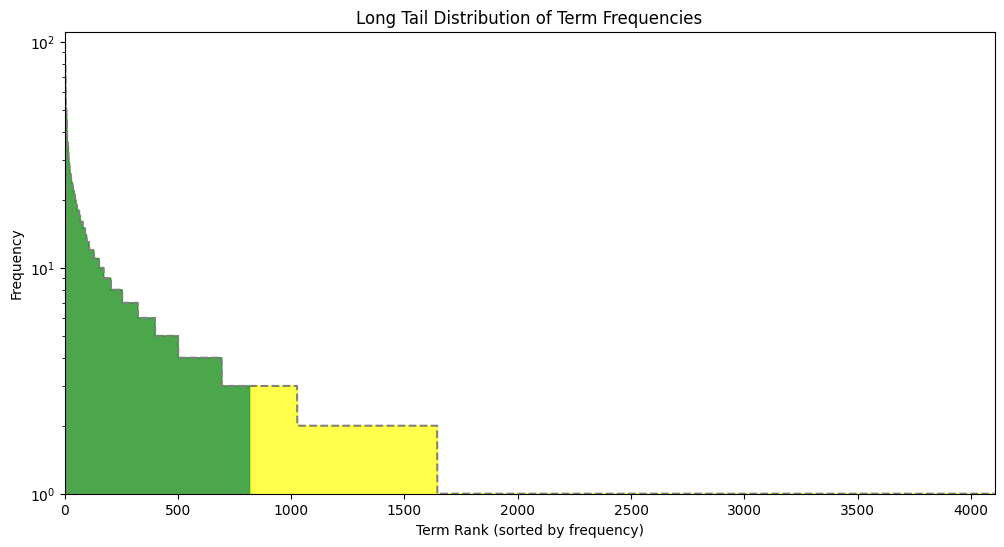

In [51]:
#用matplotlib
# 計算詞頻
terms = count_vect.get_feature_names_out()
freqs = np.asarray(df_counts.sum(axis=0))[0]

# 排序（從大到小）
freqs_sorted = np.sort(freqs)[::-1]
x = np.arange(len(freqs_sorted))

head_ratio = 0.2
cut = max(1, int(len(freqs_sorted) * head_ratio))

# 畫長尾分布
plt.figure(figsize=(12,6))
plt.plot(freqs_sorted, marker='None', linestyle='--', color='gray')

plt.fill_between(x[:cut], freqs_sorted[:cut], color='green', alpha=0.7, label="Head")
plt.fill_between(x[cut:], freqs_sorted[cut:], color='yellow', alpha=0.7, label="Tail")

plt.title("Long Tail Distribution of Term Frequencies")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.yscale("log")  # 可選：用 log scale 更清楚看到尾巴

plt.margins(x=0, y=0) #邊界空白設成 0

plt.show()

### >>> **Exercise 15:** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

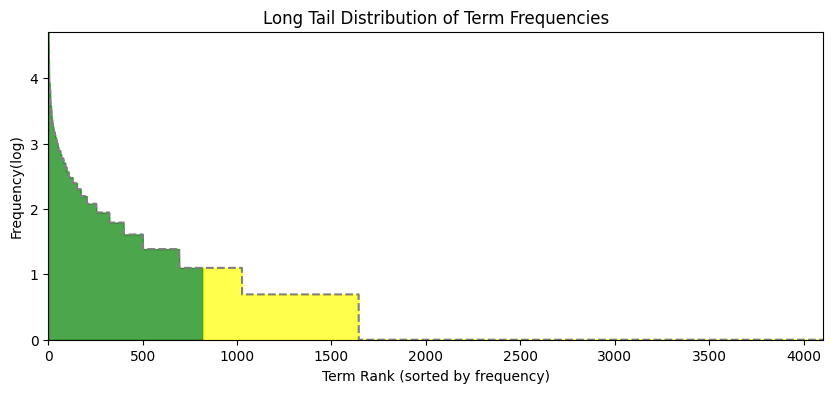

In [52]:
# Answer here

#現畫畫看取log的圖形狀況
# 計算詞頻
terms = count_vect.get_feature_names_out()
freqs = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in freqs]

# 排序（從大到小）
freqs_sorted = np.sort(term_frequencies_log)[::-1]
x = np.arange(len(freqs_sorted))

head_ratio = 0.2
cut = max(1, int(len(freqs_sorted) * head_ratio))

# 畫長尾分布
plt.figure(figsize=(10,4))
plt.plot(freqs_sorted, marker='None', linestyle='--', color='gray')

plt.fill_between(x[:cut], freqs_sorted[:cut], color='green', alpha=0.7, label="Head")
plt.fill_between(x[cut:], freqs_sorted[cut:], color='yellow', alpha=0.7, label="Tail")

plt.title("Long Tail Distribution of Term Frequencies")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency(log)")
#plt.yscale("log")  # 可選：用 log scale 更清楚看到尾巴

plt.margins(x=0, y=0) #邊界空白設成 0

plt.show()


### **Third Part:**
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 

### Figure 1
生成正向情緒 (label==1.0)的詞頻率排序前50的詞彙 

同時還去掉了停用詞

In [53]:
# Answer here

#取出 label==1.0 的正向詞彙
positive_df = stock_df[stock_df['label']==1.0]

#重新vectorize 
count_vect = CountVectorizer(stop_words="english") #去除停用詞
positive_counts = count_vect.fit_transform(positive_df['text'])

#算詞頻，取前50最常出現的詞

terms = count_vect.get_feature_names_out()
freqs = np.asarray(positive_counts.sum(axis=0)).ravel()
top_n = 50
df_terms = pd.DataFrame({"term": terms, "frequency": freqs})
df_top = df_terms.sort_values("frequency", ascending=False).head(top_n)

print(df_top.head())

fig = px.bar(df_top, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues", 
             title=f"Top {top_n} Terms Frequency of Positive Label")
fig.show()

           term  frequency
498        just         16
403        good         14
885  technology         12
831        star         11
279       doing          9


### Fifure 2
生成負面情緒（ label== -1.0） 的詞頻率排序前50的詞彙 


In [54]:
# Answer here

#取出 label== -1.0 的負面詞彙
negative_df = stock_df[stock_df['label']== -1.0]

#重新vectorize 
count_vect = CountVectorizer(stop_words="english") #去除停用詞
negative_counts = count_vect.fit_transform(negative_df['text'])

#算詞頻，取前50最常出現的詞

terms = count_vect.get_feature_names_out()
freqs = np.asarray(negative_counts.sum(axis=0)).ravel()
top_n = 50
df_terms = pd.DataFrame({"term": terms, "frequency": freqs})
df_top = df_terms.sort_values("frequency", ascending=False).head(top_n)

print(df_top.head())

fig = px.bar(df_top, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues", 
             title=f"Top {top_n} Terms Frequency of Negative Label")
fig.show()

        term  frequency
1813   trump         60
325    china         46
982     just         43
1277  people         28
1042    like         28


### Figure 3

In [55]:
# 取前20最常出現的詞（全體文章）

top_n = 20

""" 前面做過了
#terms = count_vect.get_feature_names_out()
#freqs = np.asarray(df_counts.sum(axis=0))[0]
#df_terms = pd.DataFrame({"term": terms, "frequency": freqs})
"""
df_top = df_terms.sort_values("frequency", ascending=False).head(top_n)

top_terms = df_top["term"].tolist() 

# === 新增部分：計算每個 label 的詞頻 ===
vect = CountVectorizer(stop_words="english", vocabulary=top_terms)

pos_counts = vect.fit_transform(stock_df[stock_df["label"]==1.0]["text"])
neu_counts = vect.fit_transform(stock_df[stock_df["label"]==0.0]["text"])
neg_counts = vect.fit_transform(stock_df[stock_df["label"]==-1.0]["text"])

df_plot = pd.DataFrame({
    "term": np.tile(top_terms, 3),
    "frequency": np.concatenate([
        np.asarray(pos_counts.sum(axis=0)).ravel(),
        np.asarray(neu_counts.sum(axis=0)).ravel(),
        np.asarray(neg_counts.sum(axis=0)).ravel()
    ]),
    "label": (["Positive"]*top_n + ["Neutral"]*top_n + ["Negative"]*top_n)
})

# 畫圖
fig = px.bar(df_plot, 
             x="term", y="frequency", color="label", 
             barmode="group",
             title=f"Top {top_n} Terms Frequency by Sentiment")
fig.update_layout(xaxis_tickangle=-90)
fig.show()

### Figure 4 
分析 最常發言(無論是post或是comment)的前 N個用戶用戶中，的情緒分布

In [56]:
#分析 最常發言(無論是post或是comment)的前N個用戶用戶中，的大部分情緒分布

#計算每個 user 的發文數，找出前10個
top_n_users= 10
top_users = stock_df['author'].value_counts().head(top_n_users).index

# 過濾資料，只保留前 N 大發言用戶
df_top_users = stock_df[stock_df['author'].isin(top_users)]

# 按照 user 與 label 分組，計算每個情緒出現次數
user_sentiment_dist = df_top_users.groupby(['author', 'label']).size().reset_index(name="count")

user_sentiment_dist['total'] = user_sentiment_dist.groupby('author')['count'].transform('sum')
user_sentiment_dist = user_sentiment_dist.sort_values('total', ascending=False)

print(user_sentiment_dist.head())

#畫圖

fig = px.bar(user_sentiment_dist, 
             x="author", y="count", color="label",
             title="Sentiment Distribution of Top Active Users",
             barmode="stack")  # 堆疊圖
fig.show()


           author  label  count  total
17        saasfin    1.0      4     57
16        saasfin    0.0     51     57
15        saasfin   -1.0      2     57
0   AutoModerator    0.0     14     15
1   AutoModerator    1.0      1     15


# Phase 2

In [57]:
# === Step 1: 對齊欄位 & 清理 ===
# 你目前的 stock_df 只有 ["type", "author", "text", "label"]
# 我們要建立 X，並新增文字類別欄（sentiment_name）

# 建立文字標籤（對應情緒值）
sentiment_map = {-1.0: "negative", 0.0: "neutral", 1.0: "positive"}

# 確保 label 是數值型別
stock_df["label"] = stock_df["label"].astype(float)

# 新增文字標籤欄
stock_df["sentiment_name"] = stock_df["label"].map(sentiment_map)

# === Step 2: 清理 text 欄 ===
stock_df["text"] = stock_df["text"].astype(str).str.strip()
stock_df = stock_df[stock_df["text"] != ""]             # 刪掉空字串
stock_df = stock_df.dropna(subset=["sentiment_name"])   # 確保每筆都有 label

X = stock_df[["text", "label", "sentiment_name", "author", "type"]].copy()

# === Step 3: 檢查分佈 ===
print(X["sentiment_name"].value_counts(dropna=False))
X.head()



sentiment_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64


,text,label,sentiment_name,author,type
0,Calls on retards,-1.0,negative,StickyTip420,comment
1,Stunt as in like why did they even make a big ...,0.0,neutral,Comfortable-Dog-8437,comment
2,Seeing lots of red in the ticker.,0.0,neutral,Btankersly66,comment
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,emiljenfn,post
4,He didn’t say thank you.,-1.0,negative,Just-Big6411,comment


In [58]:
### Begin Assignment Here


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
labels = X['sentiment_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in labels:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in labels:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])
#「找出 X 裡所有 'sentiment_name' 欄位的值，判斷哪些等於目前這輪的 category（例如 ‘comp.graphics’）。」

In [59]:
filt_term_document_dfs.keys()
#'negative', 'neutral', 'positive']

dict_keys(['negative', 'neutral', 'positive'])

In [60]:
label_number_1=1
filt_term_document_dfs[sentiment_map[label_number_1]]



,06,10,100,116,12,153,1728,18,1981,1992,...,year,years,yelling,yes,yesterday,yields,yikes,you,your,zero
0,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
label_number_0=0
filt_term_document_dfs[sentiment_map[label_number_0]]

,00,000,01378,027,08,10,100,100k,100x,10k,...,you,young,your,yours,yourself,yoyo,yup,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
label_number_neg1=-1
filt_term_document_dfs[sentiment_map[label_number_neg1]]

,000,02,03,10,100,1000,10000,11,12,13,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
label_number=0 #-1,0,1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
term_document_dfs = {}

for sentiment in labels:
    print(f'For label {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment])

# Example: Display the filtered DataFrame for one of the labels
print(f"Filtered Term-Document Frequency DataFrame for label {labels[label_number]}:")
term_document_dfs[labels[label_number]]


For label negative we filter the following words:
Bottom 1.0% words: 
knowing         1
shame           1
housing         1
sheet           1
shel            1
hour            1
hostility       1
hosed           1
horrible        1
hopefully       1
hope            1
hood            1
shell           1
honest          1
homelessness    1
shelves         1
home            1
holy            1
huh             1
humans          1
humphrey        1
dtype: int64
Top 5.0% words: 
bad           11
these         11
most          12
literally     12
shit          12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64
For label neutral we filter the following words:
Bottom 1.0% words: 
japan            1
msci             1
mpm              1
movies           1
moves            1
moved            1
mouth            1
mou              1
mornings         1
momentum         1
moderators       1
models           1
moar        

,000,02,03,10,100,1000,10000,11,12,13,...,yeah,year,years,yet,yields,yippee,yo,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 16 :** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [64]:
The top frequent words across all categories include common stopwords like “the”, “and”, “to”.

Negative texts emphasize emotion and dissatisfaction words such as "bad"(11 times), "shits"(12)
    Bottom rare words: contain “hope”, “holy”, “homelessness”, “honest”, etc.
    These words are meaningful but occur only once,
    showing semantic diversity and topic-specific context (many negative posts describe unique personal experiences).

Neutral texts are descriptive and information-driven words such as "dollar"(11), "week"(11),and "portfolio"(11)
    Bottom rare words: include “metals”, “models”, “momentum”, etc.
    These may be specific company or sector terms that appear infrequently.

Positive texts focus on optimism and evaluation words such as  "good" (14),"technology"(12), "market"(9), "up"(10)
    Bottom rare words: include “morning”, “months”, “msft”, “movement”, etc.
    These indicate diverse mentions of specific companies or times, but occur too sparsely to characterize the group.


SyntaxError: invalid character '“' (U+201C) (3799956449.py, line 1)

In [ ]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[sentiment])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)
    #只保留詞頻 ≥ 1 的字



Database size (total no of transactions) : 314
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.856687898089172
Maximum Transaction Size : 138
Standard Deviation Transaction Size : 13.310901494043184
Variance in Transaction Sizes : 177.74616918662625
Sparsity : 0.9942499088758054


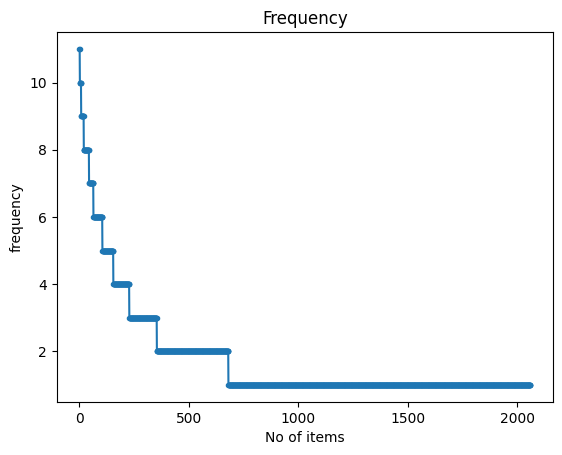

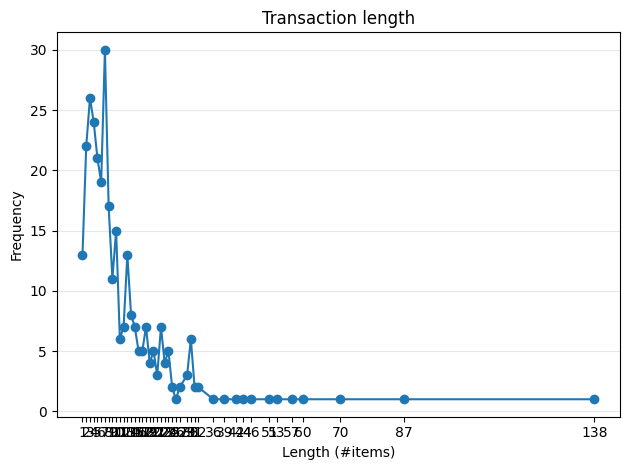

In [65]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 416
Number of items : 2586
Minimum Transaction Size : 1
Average Transaction Size : 10.790865384615385
Maximum Transaction Size : 200
Standard Deviation Transaction Size : 18.26124556638251
Variance in Transaction Sizes : 334.27663924930494
Sparsity : 0.9958271982271403


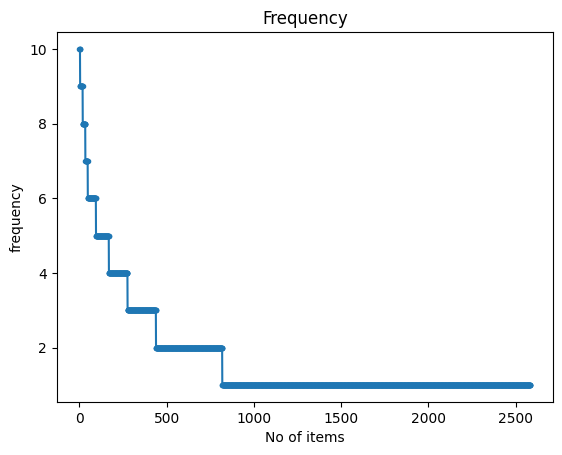

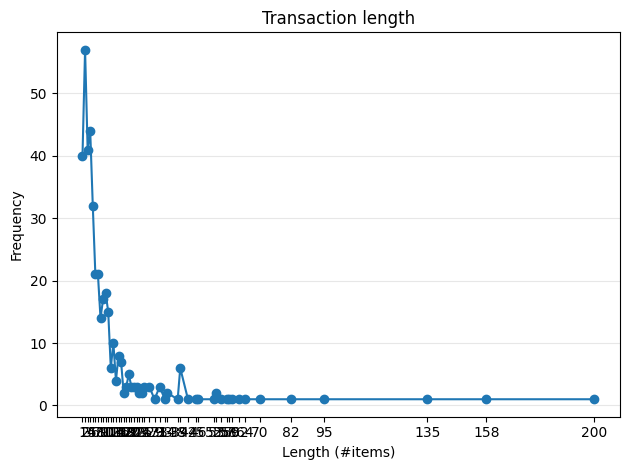

In [66]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.333333333333334
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.86273559811254
Variance in Transaction Sizes : 287.0093457943925
Sparsity : 0.9870051375037776


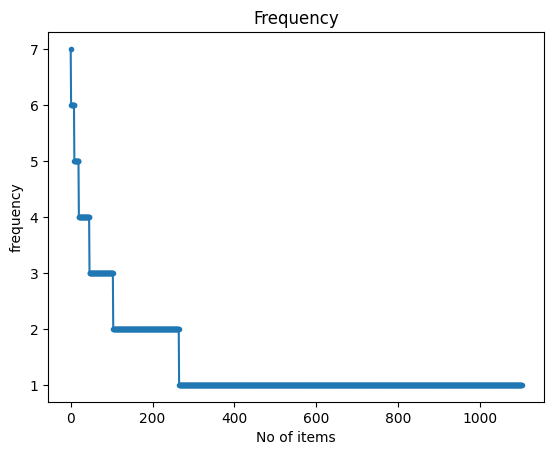

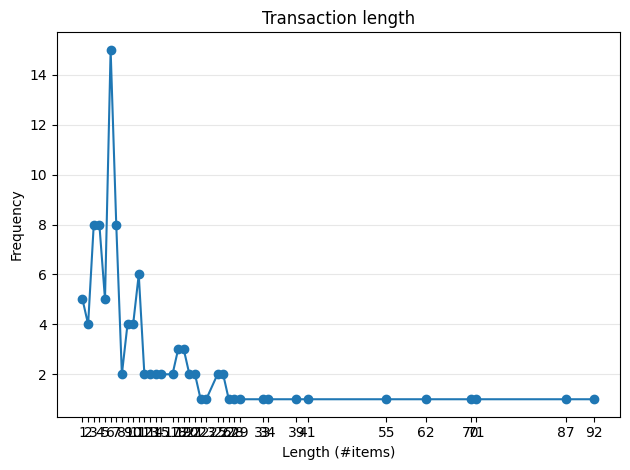

In [67]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [68]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=7 #minimum support
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 64
Runtime: 0.007174015045166016


In [69]:
obj1.save('freq_patterns_negative_minSup7.txt') #save the patterns
frequentPatternsDF_negative

,Patterns,Support
0,didn,7
1,dollar,7
2,long,7
3,believe,7
4,big,7
...,...,...
59,sure,10
60,should,10
61,again,10
62,already,11


In [70]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=7 #minimum support
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 48
Runtime: 0.0063250064849853516


In [71]:
obj2.save('freq_patterns_neutral_minSup7.txt') #save the patterns
frequentPatternsDF_neutral

,Patterns,Support
0,rise,7
1,30,7
2,rates,7
3,same,7
4,usd,7
5,world,7
6,really,7
7,please,7
8,without,7
9,ago,7


In [72]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5 #minimum support
obj3 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_positive= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 20
Runtime: 0.002706289291381836


In [73]:
obj3.save('freq_patterns_positive_minSup5.txt') #save the patterns
frequentPatternsDF_positive

,Patterns,Support
0,new,5
1,years,5
2,our,5
3,any,5
4,no,5
5,been,5
6,tariffs,5
7,me,5
8,get,5
9,better,5


In [74]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]


# Identify patterns that appear in more than one pattern
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many pattern were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each pattern, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns  Support
50  already       11
51    after       11
47     sure       10
44   things       10
49    again       10
..      ...      ...
94       no        5
93      any        5
91    years        5
90      new        5
92      our        5

[107 rows x 2 columns]
Number of patterns discarded: 25


In [75]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,than,tariffs,get,me,been,no,any,years,new,our
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17 :** 


In [77]:
from PAMI.frequentPattern.topk import FAE 
from PAMI.frequentPattern.basic import FPGrowth 
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

import time
import pandas as pd

csv = 'td_freq_db_negative.csv'
#FAE Top-K
def run_fae(csv_path, k):
    miner = FAE.FAE(iFile=csv_path, k=k)
    t0 = time.perf_counter()
    miner.mine()
    t1 = time.perf_counter()
    df = miner.getPatternsAsDataFrame()
    print(f"[FAE Top-K] k={k} | time={t1 - t0:.3f}s | patterns={len(df)}")
    print(df.head(10))
    return df, (t1 - t0)

df_fae50, t_fae50 = run_fae(csv, 50)
df_fae150, t_fae150 = run_fae(csv, 150)
df_fae250, t_fae250 = run_fae(csv, 250)


# FPGrowth列出前 10
minSup=9
obj_17 = FPGrowth.FPGrowth(iFile=csv,minSup=minSup)
t0 = time.perf_counter()
obj_17.mine()
t1 = time.perf_counter()

frequentPatternsDF= obj_17.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF)))
print(f"[FPGrowth] minSup={minSup} | time={t1 - t0:.3f}s | patterns={len(frequentPatternsDF)}")
print("FPGrowth列出前 10",frequentPatternsDF.head(10))

#MaxFPGrowth
def run_maxfp(csv_path, minsup):
    miner = alg.MaxFPGrowth(iFile=csv_path, minSup=minsup, sep='\t')
    t0 = time.perf_counter()
    miner.mine()
    t1 = time.perf_counter()
    df = miner.getPatternsAsDataFrame()
    print(f"[MaxFPGrowth] minSup={minsup} | time={t1 - t0:.3f}s | patterns={len(df)}")
    print(df.head(10))
    return df, (t1 - t0)


df_max3, t_max3 = run_maxfp(csv, 3)
df_max6, t_max6 = run_maxfp(csv, 6)
df_max9, t_max9 = run_maxfp(csv, 9)

 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE Top-K] k=50 | time=0.013s | patterns=50
  Patterns  Support
0  already       11
1    after       11
2   things       10
3     here       10
4      day       10
5     sure       10
6   should       10
7    again       10
8      end        9
9    right        9
 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE Top-K] k=150 | time=0.007s | patterns=150
  Patterns  Support
0  already       11
1    after       11
2   things       10
3     here       10
4      day       10
5     sure       10
6   should       10
7    again       10
8      end        9
9    right        9
 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE Top-K] k=250 | time=0.011s | patterns=250
  Patterns  Support
0  already       11
1    after       11
2   things       10
3     here       10
4      day       10
5     sure       10
6   should       10
7    again       10
8      end        9
9 

### 5.5 Dimensionality Reduction

In [136]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2, perplexity=15).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)
# fit_transform()學習整體資料的分佈方向，
# 把原本的 10000 維特徵壓縮成 2 維的數值空間 (projection on 2D plane)

In [79]:
X_pca_tdm.shape

(847, 2)

In [133]:
X_tsne_tdm.shape

(847, 2)

In [134]:
X_umap_tdm.shape

(847, 2)

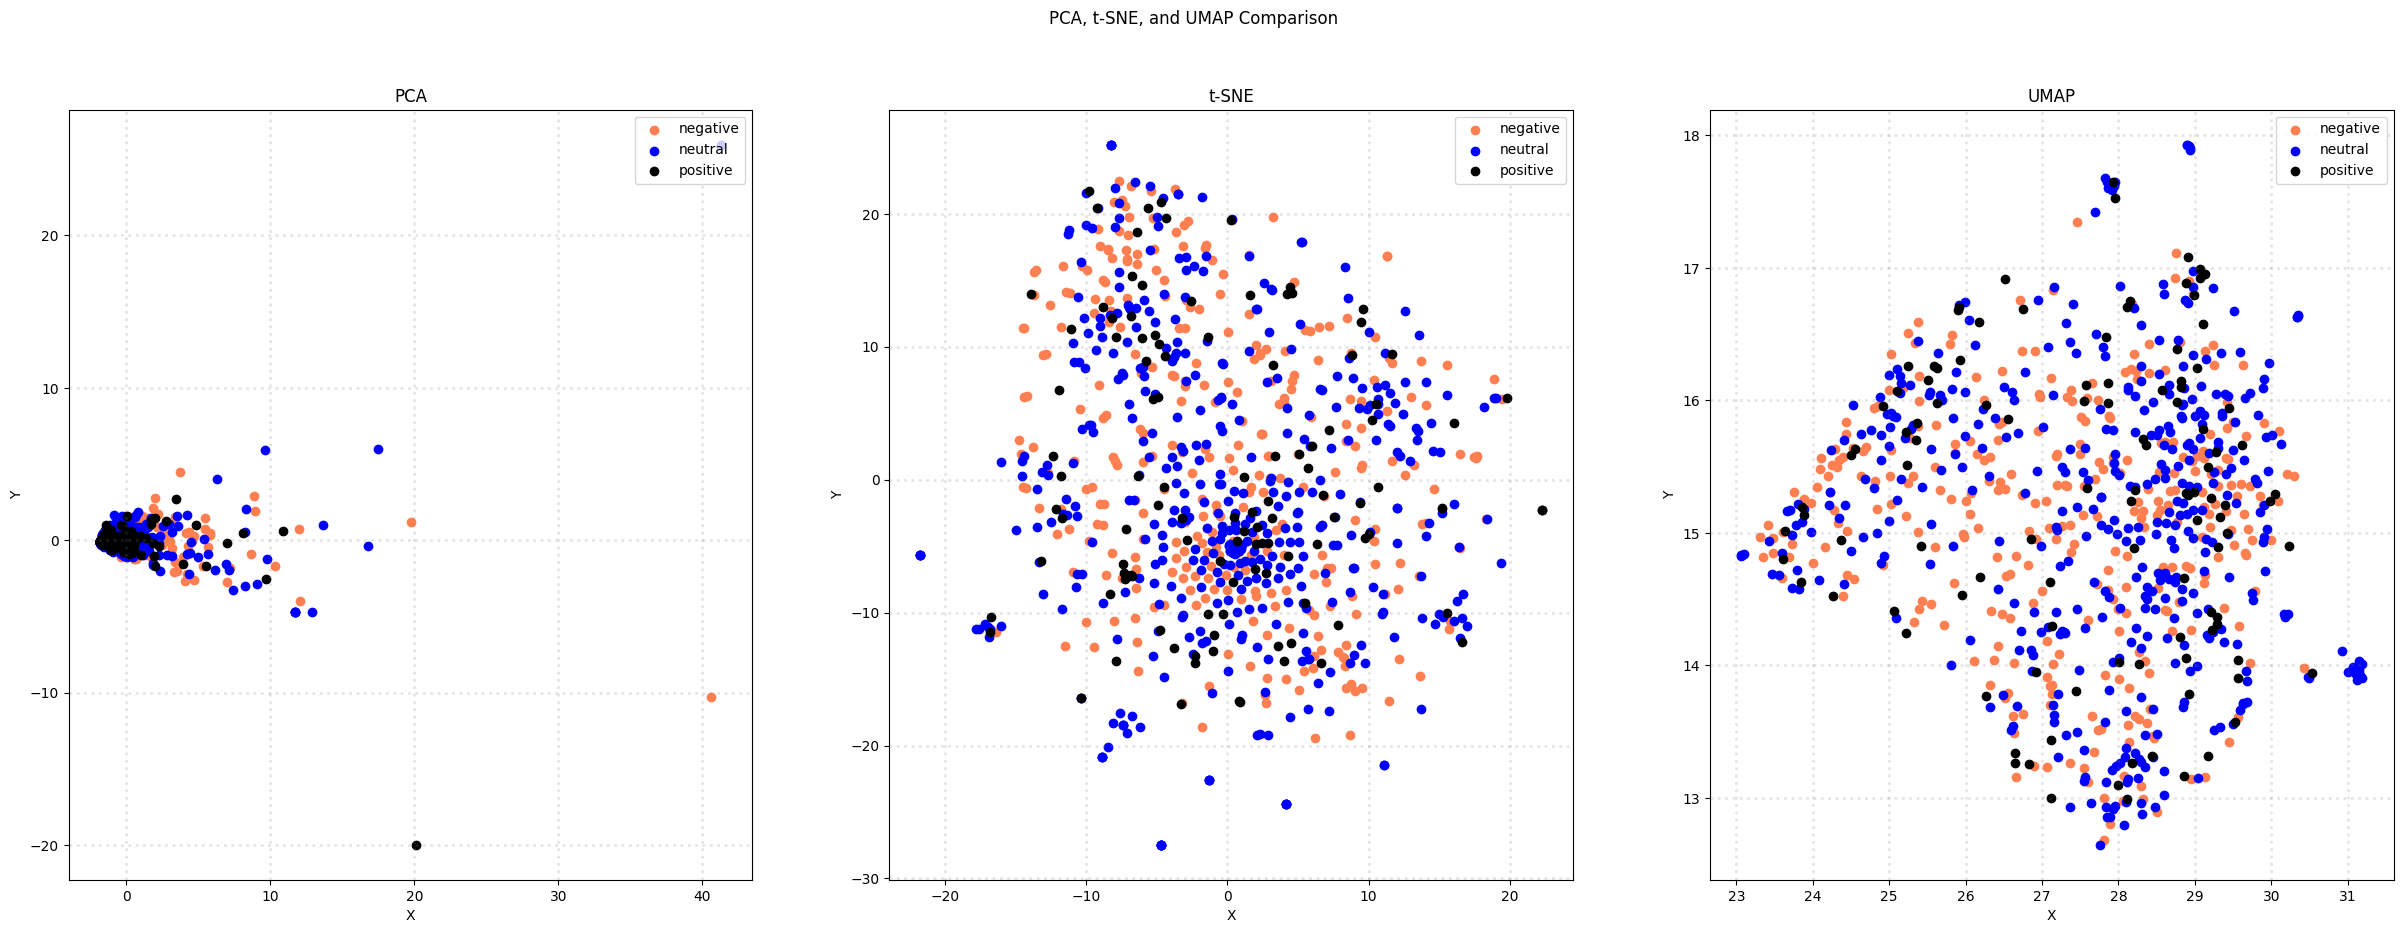

In [137]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
#(1 row × 3 columns)
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
# axes[0]: PCA, axes[1]:t-SNE, axes[2]:UMAP

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')
    

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')


plt.show()

In [140]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2, perplexity=15).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

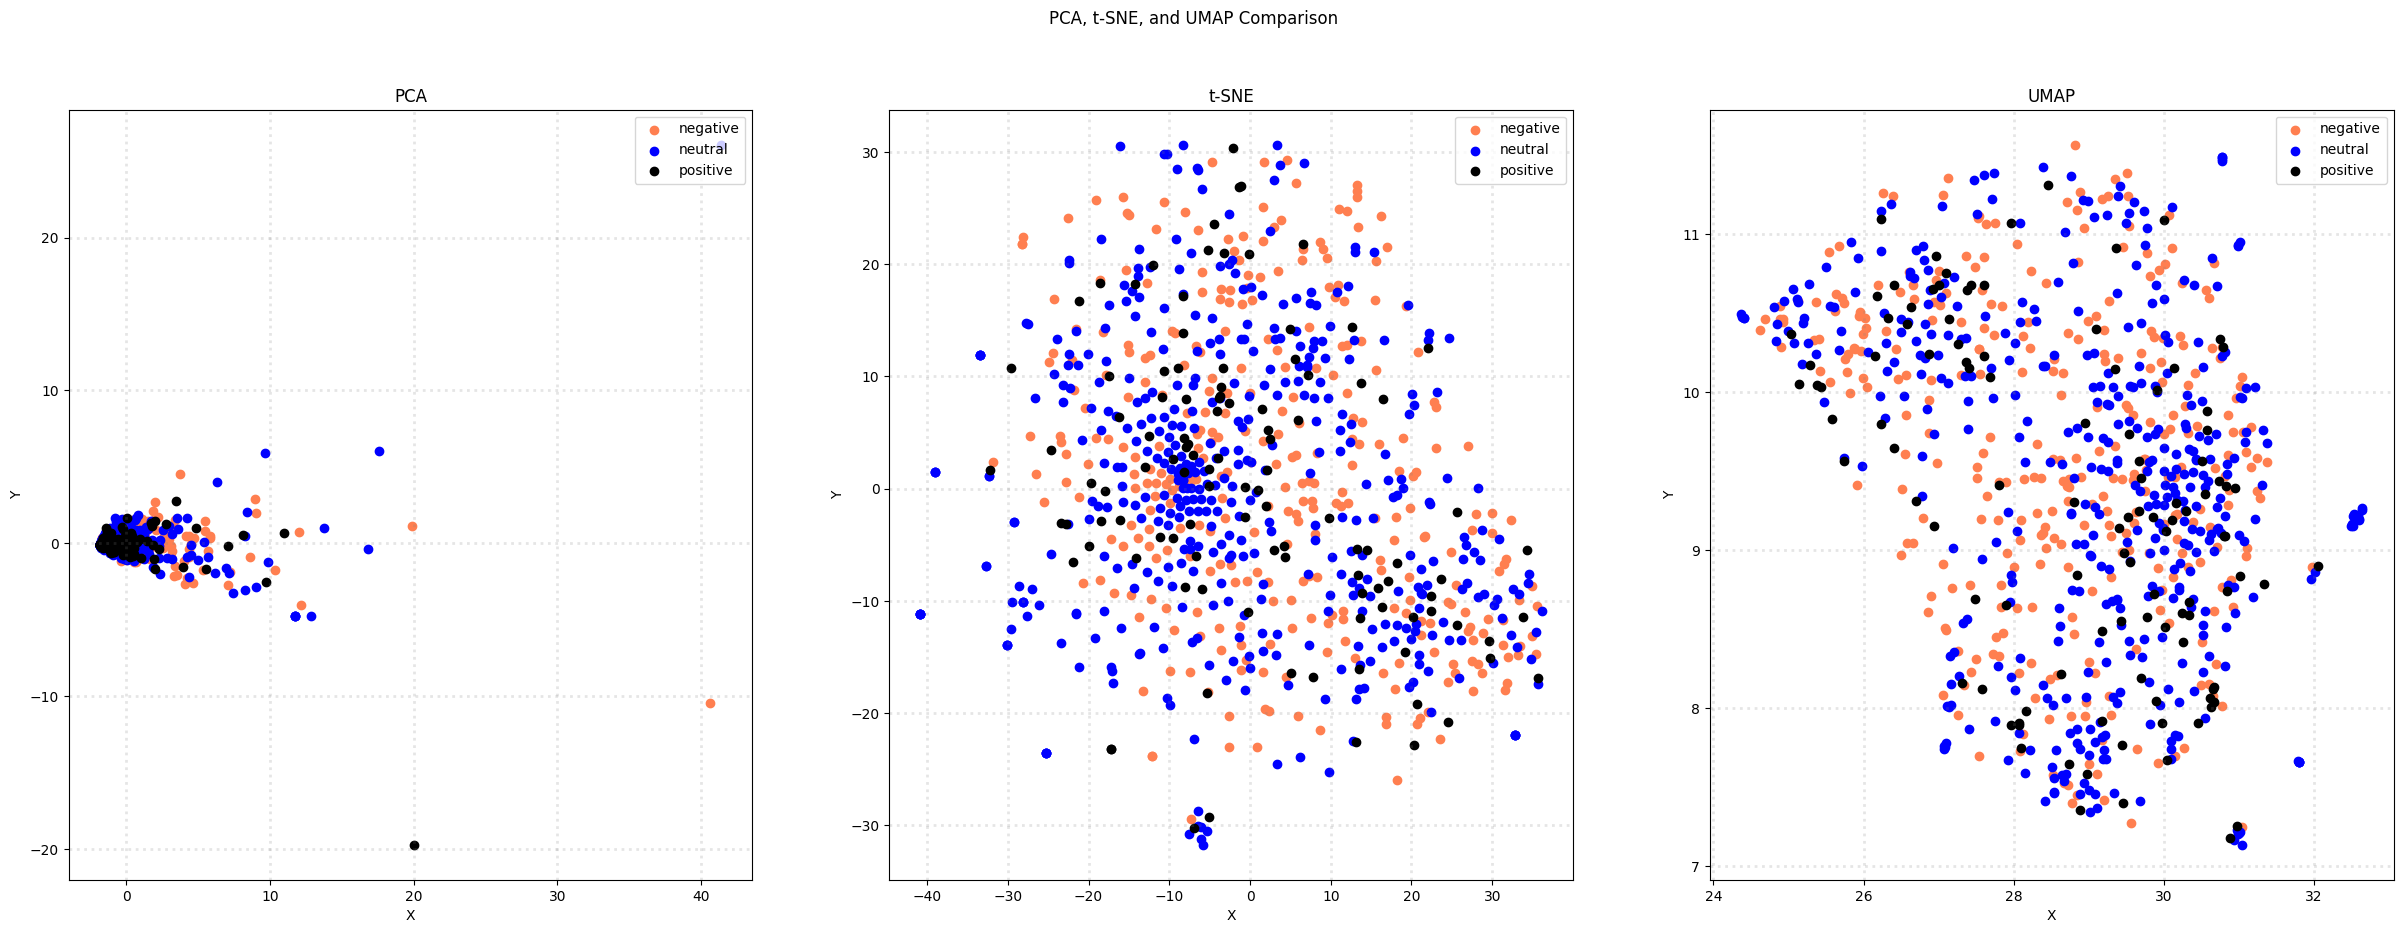

In [141]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> **Exercise 18 :** 
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.


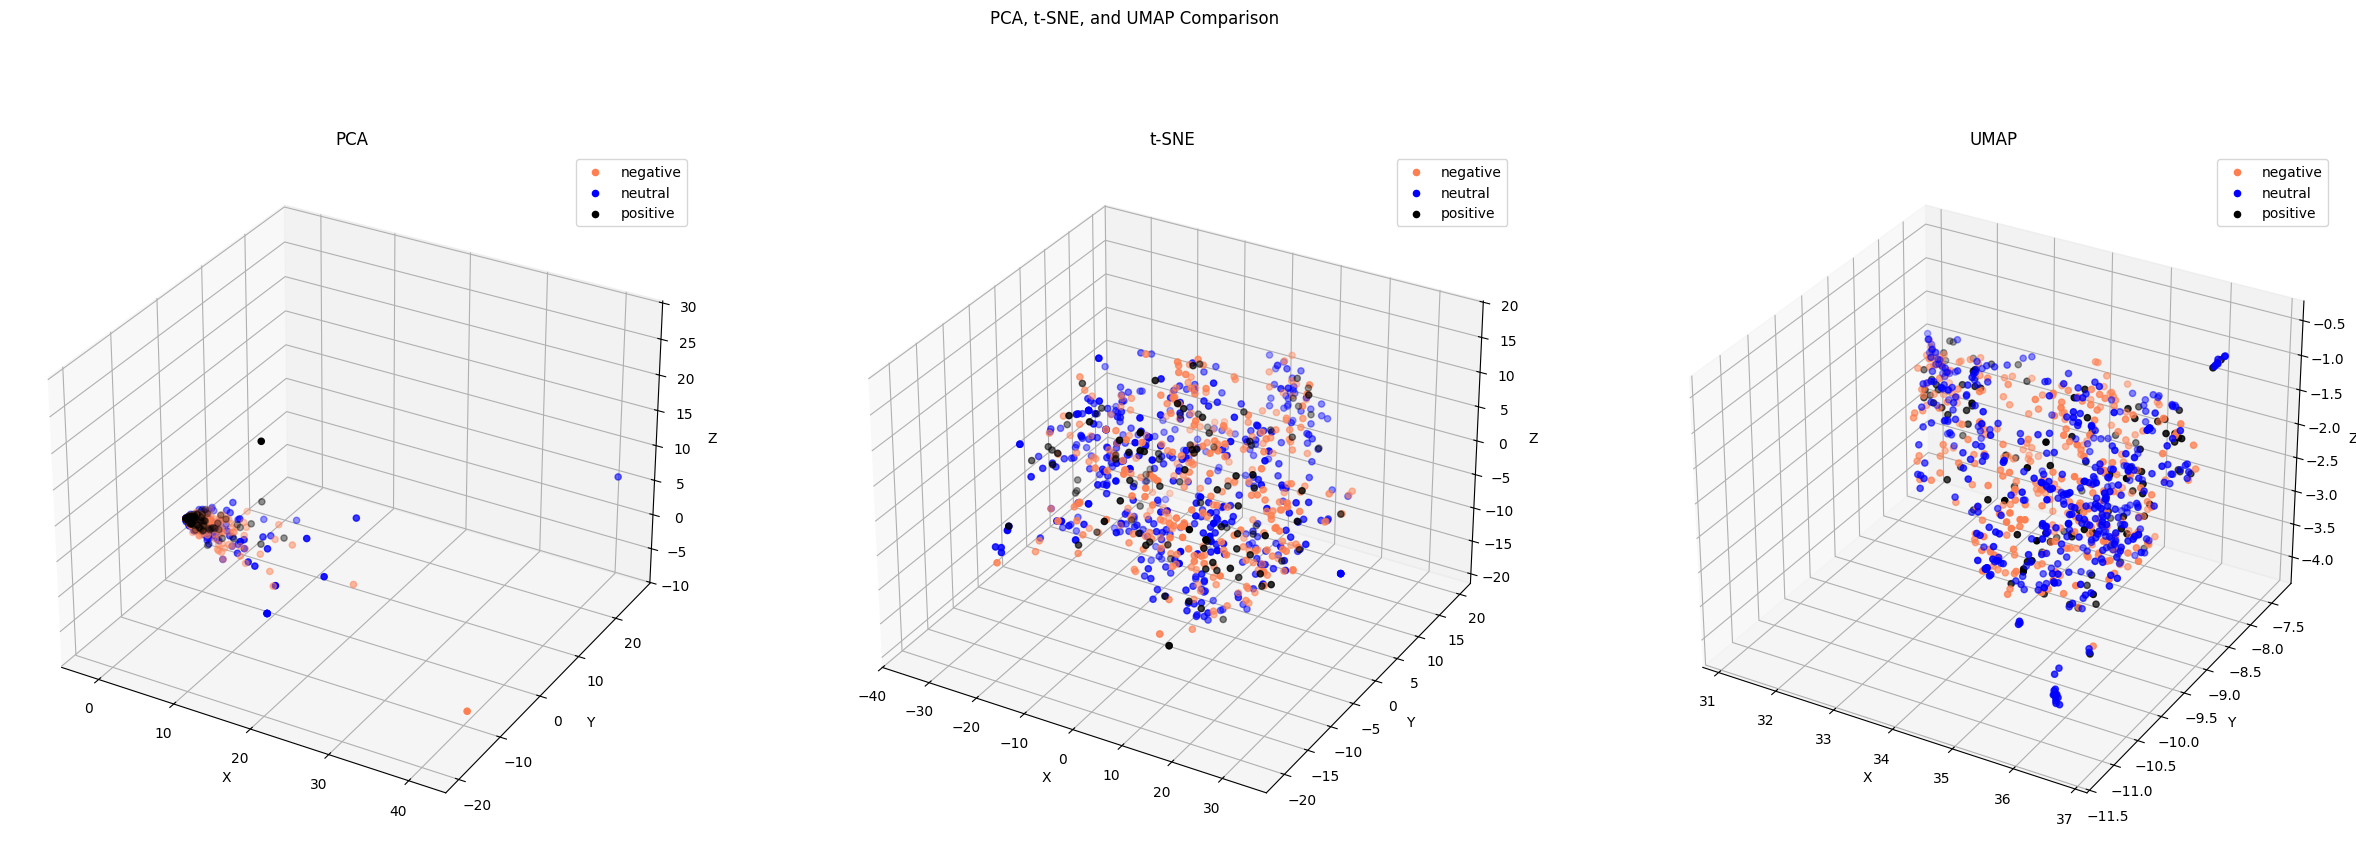

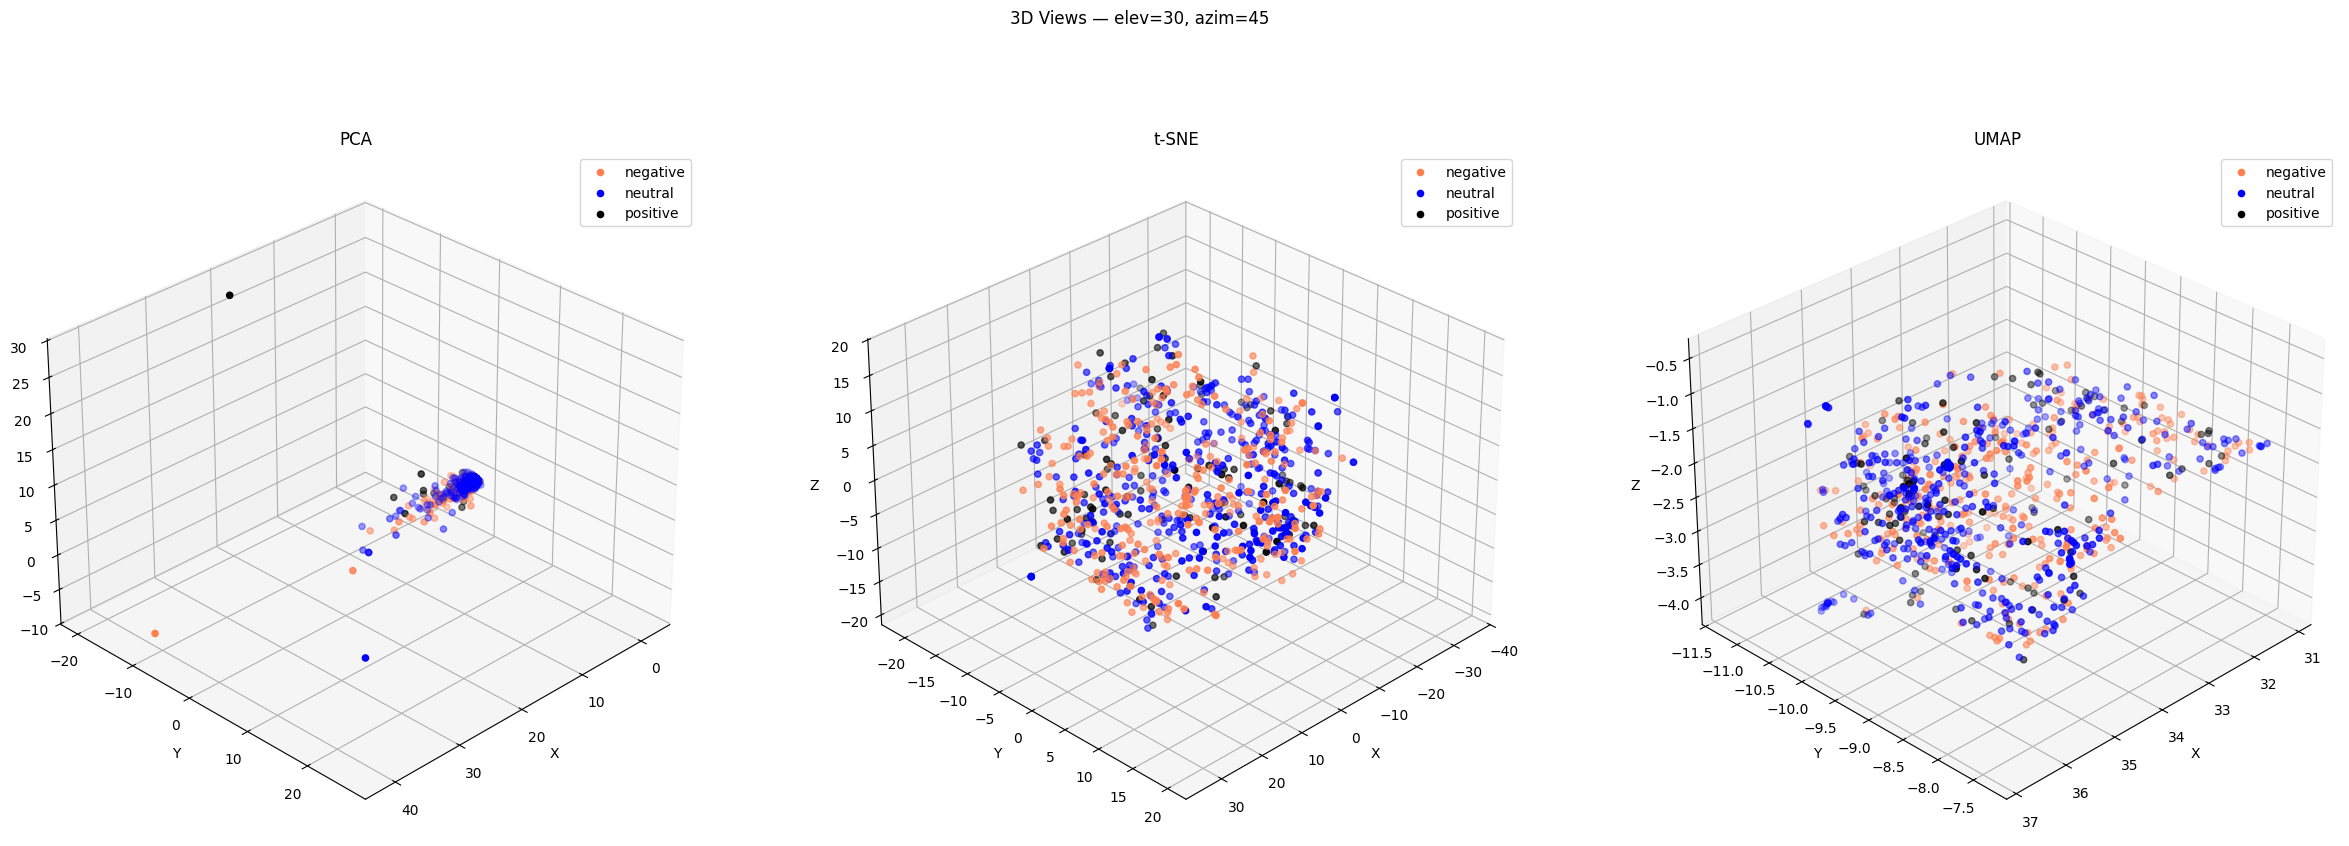

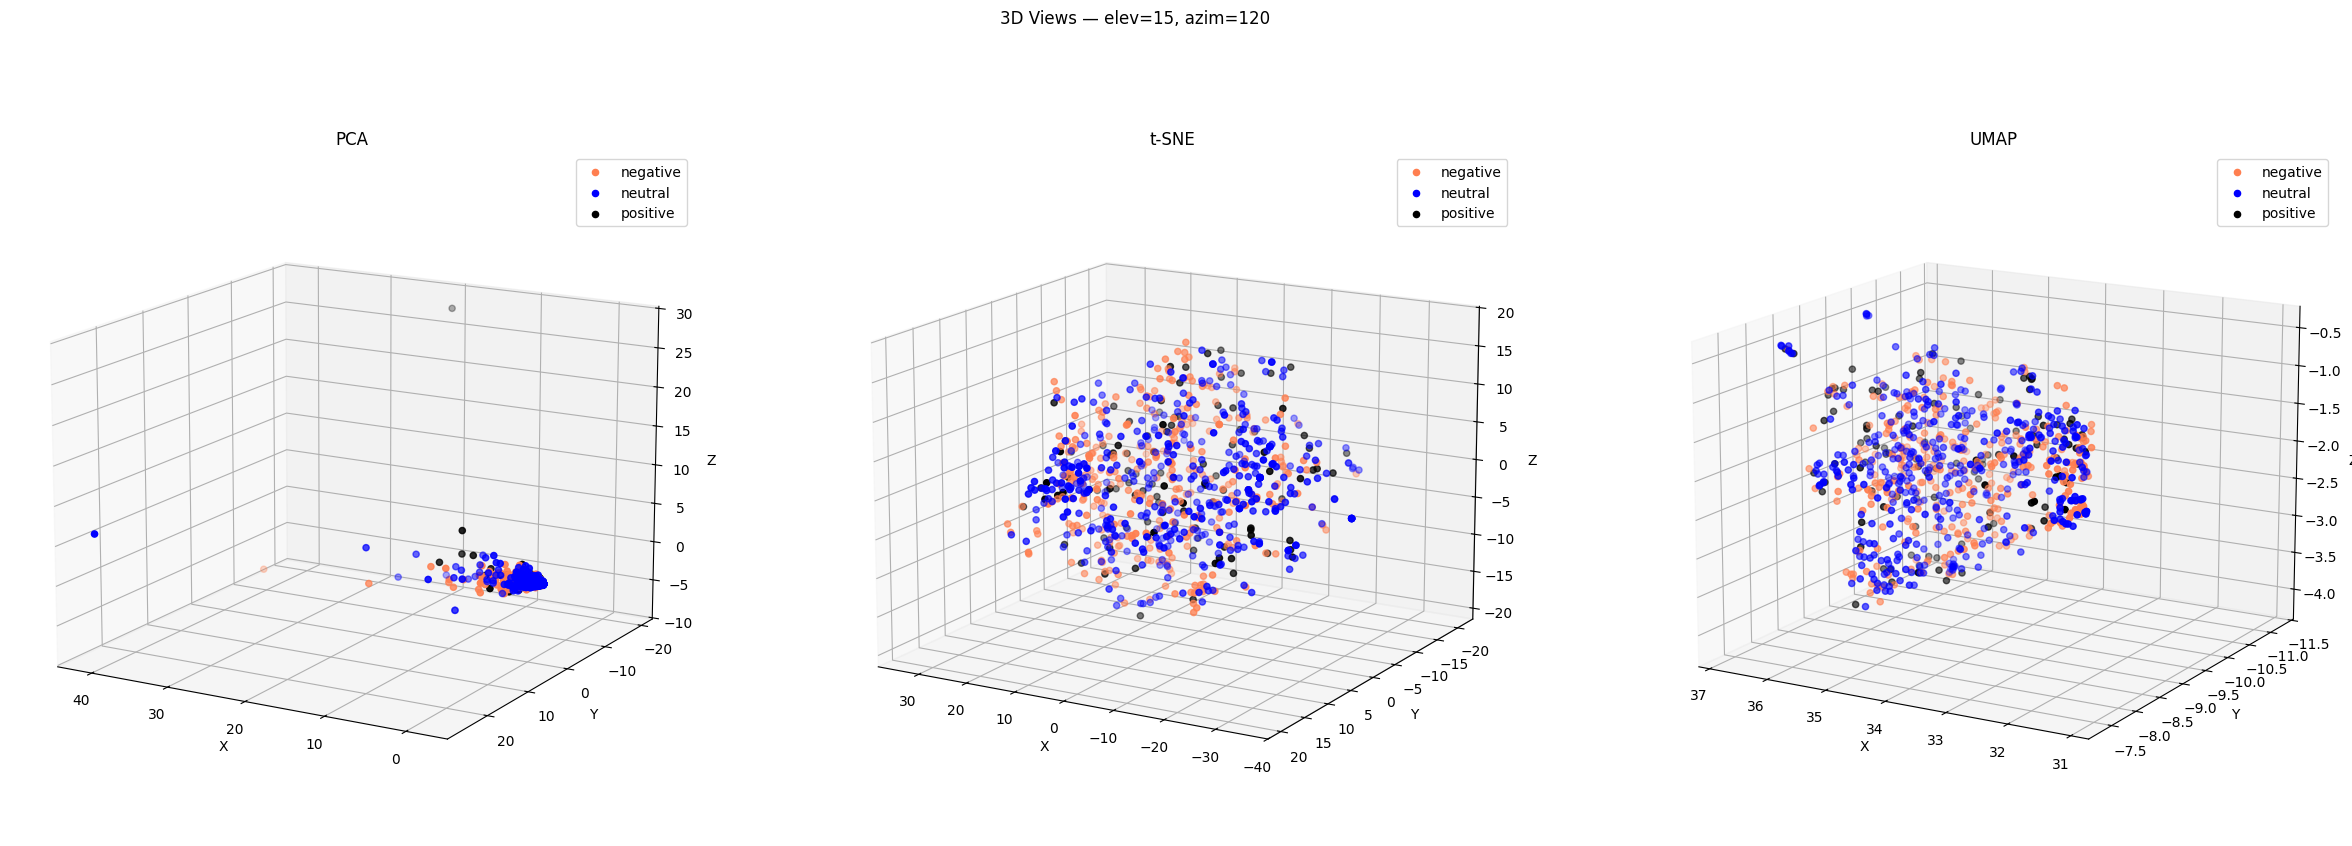

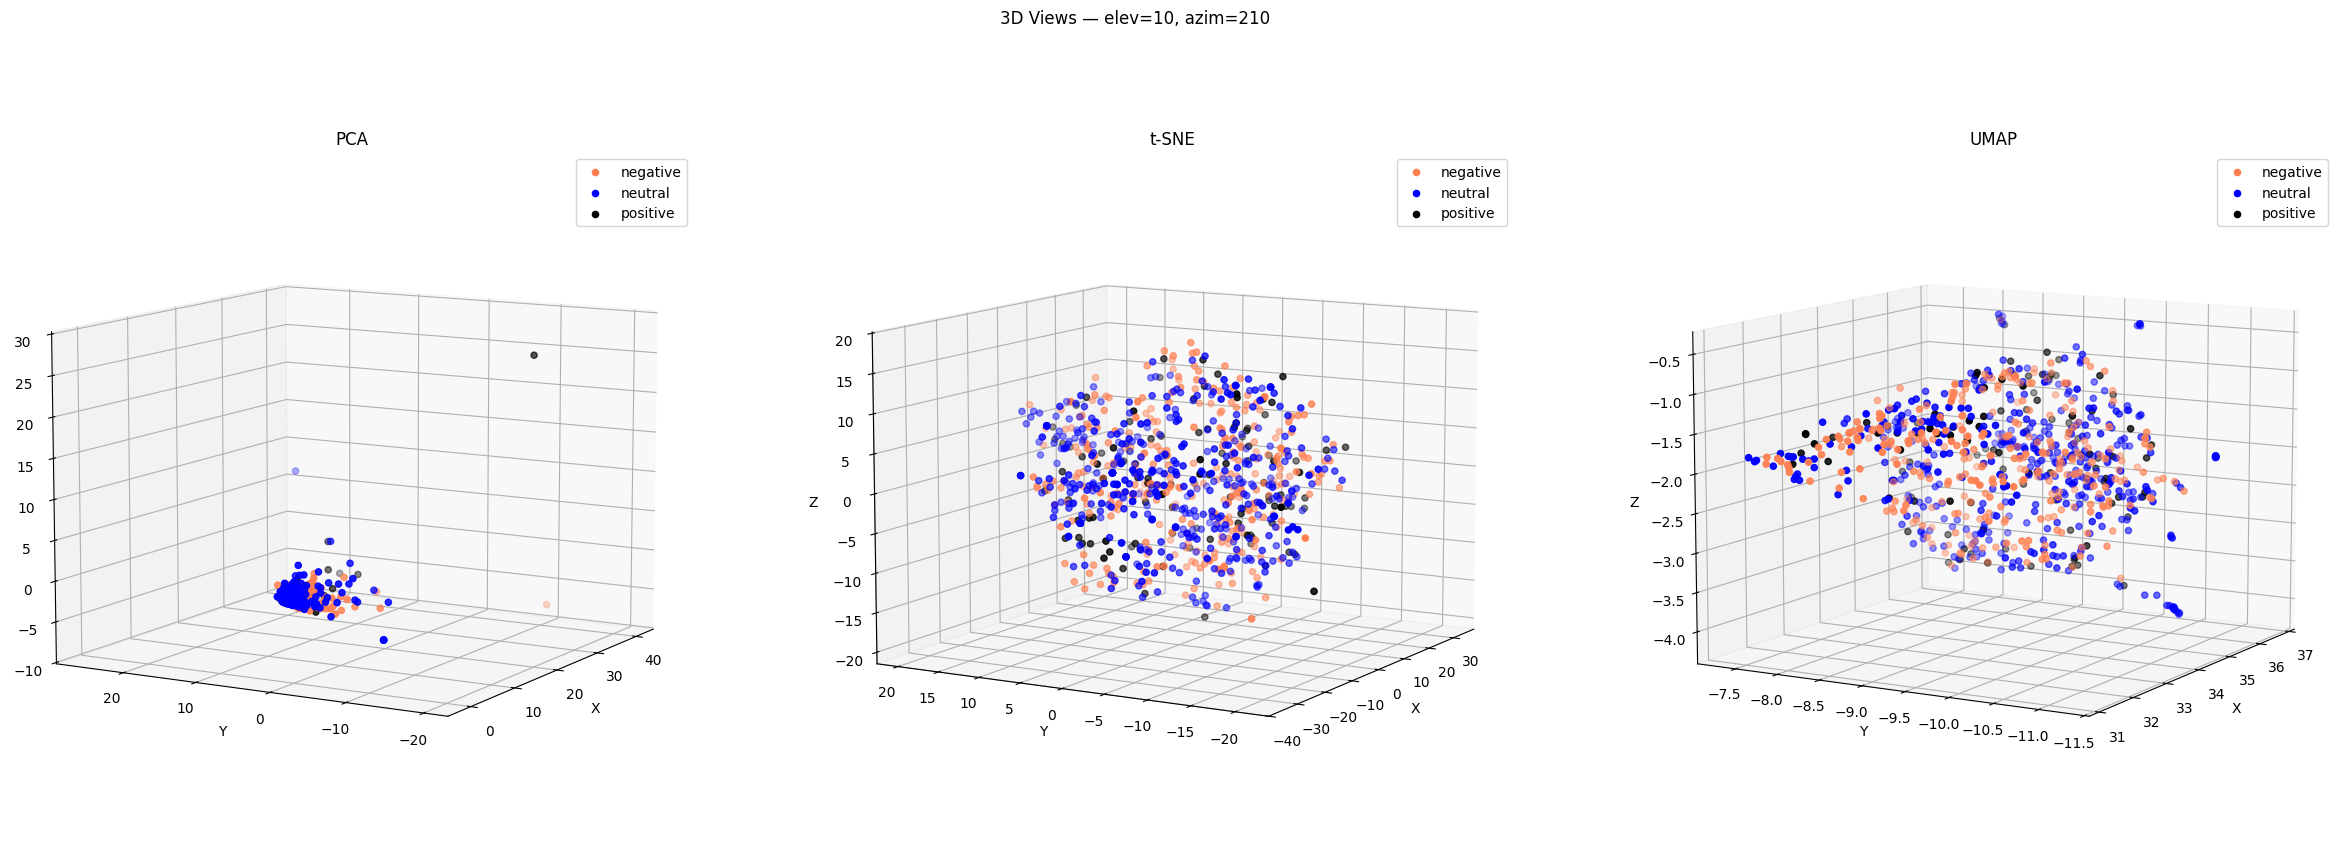

In [172]:
#Answer Here
from mpl_toolkits.mplot3d import Axes3D 
X_pca_aug_3D = PCA(n_components=3).fit_transform(augmented_df.values)
#X_tsne_aug_3D = TSNE(n_components=3).fit_transform(augmented_df.values)
Z = PCA(n_components=50, random_state=42).fit_transform(augmented_df.values)
X_tsne_aug_3D = TSNE(
    n_components=3, init='pca', perplexity=15, learning_rate='auto',
     random_state=42, method='exact'  # 3D 只能 exact，但資料小了
).fit_transform(Z)

X_umap_aug_3D = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10),subplot_kw={'projection':'3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        zs = X_reduced[X['sentiment_name'] == sentiment].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug_3D, 'PCA')
plot_scatter(axes[1], X_tsne_aug_3D, 't-SNE')
plot_scatter(axes[2], X_umap_aug_3D, 'UMAP')

for i, (elev, azim) in enumerate([(30, 45), (15, 120), (10, 210)], start=1):
    fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection':'3d'})
    fig.suptitle(f'3D Views — elev={elev}, azim={azim}')
    plot_scatter(axes[0], X_pca_aug_3D, 'PCA')
    plot_scatter(axes[1], X_tsne_aug_3D, 't-SNE')
    plot_scatter(axes[2], X_umap_aug_3D, 'UMAP')
    for ax in axes:
        ax.view_init(elev=elev, azim=azim)
    plt.show()

### 5.6 Discretization and Binarization

In [86]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [87]:
mlb = preprocessing.LabelBinarizer()

In [144]:
mlb.fit(X.label)

#「將 sentiment_name 的每個值轉成 0/1 的普通 numpy 陣列，
# 其中 非該類別=0，該類別=1，並且輸出成 dense（非稀疏）格式。」

,neg_label,0
,pos_label,1
,sparse_output,False


In [ ]:
X['bin_label'] = mlb.transform(X['label']).tolist()



In [ ]:
# del X['bin_sentiment']

In [154]:
X[0:9]

,text,label,sentiment_name,author,type,tokenized_text,bin_label
0,Calls on retards,-1.0,negative,StickyTip420,comment,"{Calls, retards, on}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,Comfortable-Dog-8437,comment,"{No, should, like, talk, big, about, they, as,...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,neutral,Btankersly66,comment,"{of, red, lots, in, Seeing, the, ticker.}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,emiljenfn,post,"{ripple, achievement., world, about, felt, Tor...","[0, 0, 1]"
4,He didn’t say thank you.,-1.0,negative,Just-Big6411,comment,"{didn’t, He, you., thank, say}","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral,PolarNimbus,comment,"{to, warm, puss, wet, wish, Hoping, ejaculate,...","[0, 1, 0]"
6,Trump will respond to china increasing their t...,-1.0,negative,stoniey84,comment,"{all, Powell., can, next, weeks, fire, increas...","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,0.0,neutral,OSRSkarma,comment,"{by, like, for, this, it, not, 2, months,, slo...","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,1.0,positive,Blondbox,comment,"{held, base, Perfectly, cup, Follow, high?, to...","[0, 0, 1]"


### >>> **Exercise 19 :** 
Try to generate the binarization using the `sentiment_name` column instead. Does it work?


In [155]:
# Answer here
mlb.fit(X.sentiment_name)
# fit() 會掃過整個 sentiment_name 欄位，找出所有 不重複的類別名稱。
X['bin_sentiment_name'] = mlb.transform(X['sentiment_name']).tolist()
print(mlb.classes_)
X.loc[:9,['bin_sentiment_name']]


['negative' 'neutral' 'positive']


,bin_sentiment_name
0,"[1, 0, 0]"
1,"[0, 1, 0]"
2,"[0, 1, 0]"
3,"[0, 0, 1]"
4,"[1, 0, 0]"
5,"[0, 1, 0]"
6,"[1, 0, 0]"
7,"[0, 1, 0]"
8,"[0, 0, 1]"
9,"[0, 0, 1]"


# 6. Data Exploration

In [119]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[30]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[350]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [120]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['> Still seems like an awful investment\n\nThat sentiment, above everything else happening, is what has me most terrified.\n\nFaith in the US economy is crumbling.']
['You don’t buy when it’s green, u buy when it’s red']


In [121]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [156]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.204124
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/452772485.py:17: Depreca

### >>> **Exercise 20 :**

Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted? 


In [166]:
#Answer
target_sentiment = 'negative'
keyword = 'trump'
for sentiment in labels:
    df_0= X[X['sentiment_name'] == target_sentiment]
    df_0 = df_0[df_0['text'].str.contains(keyword, case=False, na=False)]
print(len(df_0))
    
document_to_transform_1 = []
random_record_1 = df_0.iloc[0]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_0.iloc[3]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_0.iloc[5]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

46
['Trump will respond to china increasing their tariffs. Trump is looking to fire Jerome Powell. Earnings reporting is starting. I personally think the next few weeks are going to be brutal.... if all companies adjust downwards and JPow is fired, i can see it going down A LOT and very quickly even']
["Xi is calm and sure-footed in his response to Trump, while Trump is irrational and makes quick decisions without considering the consequence. Also, he's stupid."]
["Look,  the USA somehow thought a second term for that fool was a good idea.  This was not rational, as shown by all the people who called it before Trump took office.  \n\nWhy would you expect the market to be rational when it is partially supported by the cult of Trump? \n\nIt's going to be wild and scary and the world will never be the same."]
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.388741
Cosine Similarity using count b

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/583738311.py:58: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/583738311.py:59: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/583738311.py:60: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_2542/583738311.py:62: Depreca

### Obeservation from exercise20:
In the original setting, the cosine similarity between random short Reddit posts was very low (typically below 0.2), because the texts were short and covered diverse topics.

After filtering for posts that were both negative and contained the keyword “trump”, the cosine similarity increased to around 0.38–0.39, as these posts shared overlapping vocabulary and a common semantic theme (politics and market reactions).

This demonstrates that cosine similarity effectively reflects lexical and topical overlap — even when sentiment labels are the same, similarity depends strongly on whether the posts discuss related contexts or not.

# 7. Data Classification

In [124]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['label', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

In [125]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    negative     0.5854    0.7347    0.6516        98
     neutral     0.6393    0.6446    0.6420       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



### >>> **Exercise 21 :** 
Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [167]:
#Answer
"""
When training model ,scikit-learn 的分類器（例如 MultinomialNB）
只能接受數字類別 (y_train, y_test)，而不是字串。
但在輸出結果的時候，我們直覺上希望看到的是字串("comp.graphics: ", instead of "0: ")
e.g. 
array([
    [-1, 'negative'],
    [0, 'neutral'],
    [1, 'positive']
])
接著轉成dict()
output:
{
    0: 'negative',
    1: 'neutral',
    2: 'positive',
}
"""
#Model with augmentated data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['label', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    negative     0.5760    0.7347    0.6457        98
     neutral     0.6500    0.6446    0.6473       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4420    0.4690    0.4455       255
weighted avg     0.5439    0.5922    0.5615       255



### >>> **Exercise 22 :** 
What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?


In [169]:
"""
Using the original TDM:
Accuracy: 0.592156862745098
Classification Report:
               precision    recall  f1-score   support

    negative     0.5760    0.7347    0.6457        98
     neutral     0.6500    0.6446    0.6473       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4420    0.4690    0.4455       255
weighted avg     0.5439    0.5922    0.5615       255


Using Augmented TDM:
Accuracy: 0.592156862745098
Classification Report:
               precision    recall  f1-score   support

    negative     0.5760    0.7347    0.6457        98
     neutral     0.6500    0.6446    0.6473       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4420    0.4690    0.4455       255
weighted avg     0.5439    0.5922    0.5615       255
    
It seems that the accuracy remains almost the same between the original TDM and the augmented TDM.
Some probably factors may explain this result:
1. Data imbalance
the dataset is imblanced across 3 sentiment types: neutral 423、negative 315、positive 109
This imbalance causes the classifier to bias toward the majority classes, which leads to ustable prediction performance.

2. Insufficient sample size
The positive sentiment category contains only 109 samples.
After splitting the dataset (7:3), the model has too few examples to learn meaningful and stable patterns for this class.

3. the pattern may not useful to 代表 the accurate sentiment words.
In 20newsgroup dataset, frequent patterns help because categories are based on topics; 
however in the Reddit dataset, labels are based on sentiments rather than topics.
The co-occurring words may simply reflect similar discussion subjects (e.g., the same stock or news event) rather than positive or negative emotions.
As a result, the added frequent pattern features do not effectively improve sentiment classification performance, 
and the Naive Bayes model remains limited in this context.
"""    


'\nUsing the original TDM:\nAccuracy: 0.592156862745098\nClassification Report:\n               precision    recall  f1-score   support\n\n    negative     0.5760    0.7347    0.6457        98\n     neutral     0.6500    0.6446    0.6473       121\n    positive     0.1000    0.0278    0.0435        36\n\n    accuracy                         0.5922       255\n   macro avg     0.4420    0.4690    0.4455       255\nweighted avg     0.5439    0.5922    0.5615       255\n\n\nUsing Augmented TDM:\nAccuracy: 0.592156862745098\nClassification Report:\n               precision    recall  f1-score   support\n\n    negative     0.5760    0.7347    0.6457        98\n     neutral     0.6500    0.6446    0.6473       121\n    positive     0.1000    0.0278    0.0435        36\n\n    accuracy                         0.5922       255\n   macro avg     0.4420    0.4690    0.4455       255\nweighted avg     0.5439    0.5922    0.5615       255\n\nIt seems that the accuracy remains almost the same between

### Decision Tree Classifier

In [170]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    negative     0.4878    0.4082    0.4444        98
     neutral     0.5294    0.6694    0.5912       121
    positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



### >>> **Exercise 23 :** 
Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

In [ ]:
> The characteristics of text data and model behavior.
"""
1.	High-dimensional and sparse features
Text data represented by term-document matrices contains thousands of sparse word features.
Decision Trees struggle to find stable and meaningful splits in such high-dimensional spaces, often leading to overfitting or random decisions.

2.	Naive Bayes handles sparse data better
Naive Bayes models the conditional probability of words given a class.
It performs well even with limited samples because it assumes feature independence and can generalize from few word occurrences.

3.	Small dataset and imbalanced classes
With relatively few samples per sentiment (especially the positive class),
Decision Trees cannot build reliable branches, while Naive Bayes remains more robust with small and noisy data.

As a result, the Naive Bayes model achieves higher accuracy and generalization,
while Decision Trees tend to overfit and perform worse on unseen data.
"""

### >>> **Exercise 24 :** 
Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [ ]:
#Answer
# Decision Tree with augmented data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment_name'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

"""
The augmented data slightly improved the Decision Tree’s accuracy, but not significantly.
Frequent pattern features captured word co-occurrences, not emotional polarity, so they added little useful information.
Decision Trees still perform worse than Naive Bayes because they overfit in sparse, high-dimensional text data,
while Naive Bayes handles sparse features and small datasets more effectively.

"""


Decision Tree Accuracy (TDM): 0.4745098039215686

Classification Report:
               precision    recall  f1-score   support

    negative     0.4588    0.3980    0.4262        98
     neutral     0.5270    0.6446    0.5799       121
    positive     0.1818    0.1111    0.1379        36

    accuracy                         0.4745       255
   macro avg     0.3892    0.3846    0.3814       255
weighted avg     0.4521    0.4745    0.4585       255



### >>> **Exercise 25 :** 


In [ ]:
Already answered in DM2025-Lab1-Master.ipynb

-------

In [ ]:
"""
PCA (Principal Component Analysis)
－ Linear
－ Fast, preserves global structure
－ Not good for non-linear or sparse text data
t-SNE
－ Non-linear
－ Reveals local clusters clearly
－ Slow, sensitive to parameters (especially perplexity)
UMAP
－ Non-linear
－ Faster, preserves both global + local structures
－ Results may vary with seed; needs tuning

PCA 是「線性投影」，把資料壓縮成最能保留整體變異的方向。
	•	t-SNE 是「鄰域保持」法，擅長畫出漂亮的群集，但全域關係會扭曲。
	•	UMAP 比 t-SNE 快、穩定度高，是目前很常見的替代方案。
"""

In [ ]:
"""
Text Data → Bag of Words → Dimensionality Reduction → Visualization 
📂 Raw Text Dataset (X)
│
├── Each row = one document
│   └── Columns: ["text", "category_name", ...]
│
▼
🧮 CountVectorizer → Term-Document Matrix (TDM)
│
│  Example shape: (n_documents, n_words)
│  ├── Each row = one document (article)
│  └── Each column = one word feature (term frequency)
│
│     [doc1] → [0, 3, 0, 5, ...]  
│     [doc2] → [1, 0, 2, 0, ...]  
│
▼
📉 Dimensionality Reduction
│
│  PCA / t-SNE / UMAP → project to 2 dimensions  
│
│  Output shape: (n_documents, 2)
│  ├── col[0] = x-coordinate
│  └── col[1] = y-coordinate
│
│     [doc1] → [ 0.52, -1.34 ]  
│     [doc2] → [ 1.12,  0.07 ]  
│
▼
🎨 Visualization (Matplotlib / Plotly)
│
│  for each category:
│     - filter docs: X['category_name'] == 'comp.graphics'
│     - xs = X_reduced.T[0] → X-axis
│     - ys = X_reduced.T[1] → Y-axis
│     - ax.scatter(xs, ys, color=c, label=category)
│
│
├── axes[0] → PCA result
├── axes[1] → t-SNE result
└── axes[2] → UMAP result

"""